### Eda de peliculas

In [3]:
# Importar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf


In [4]:
path = '../csvs/peliculas/peliculas_final.csv'
datos = pd.read_csv(path, sep=',')
datos.head()

,id,type,title,director,cast,country,date_added,release_year,rating,duration_type,duration_int,score
0,ns1,movie,dick johnson is dead,kirsten johnson,SinDato,united states,2021-09-25,2020,pg-13,min,90,3.611111
1,ns2,tv show,blood & water,SinDato,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,season,2,3.552632
2,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",SinDato,2021-09-24,2021,tv-ma,season,1,3.597938
3,ns4,tv show,jailbirds new orleans,SinDato,SinDato,SinDato,2021-09-24,2021,tv-ma,season,1,3.561616
4,ns5,tv show,kota factory,SinDato,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,season,2,3.593023


In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       22998 non-null  object 
 4   cast           22998 non-null  object 
 5   country        22998 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_type  22516 non-null  object 
 10  duration_int   22998 non-null  int64  
 11  score          22998 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.1+ MB


In [73]:
datos.describe()

,release_year,duration_int,score
count,22998.000000,22998.000000,22998.000000
mean,2010.811244,65.710584,3.533443
std,15.401142,51.760868,0.048564
min,1920.000000,0.000000,3.336478
25%,2010.000000,3.000000,3.500000
50%,2016.000000,83.000000,3.533673
75%,2019.000000,101.000000,3.567000
max,2021.000000,601.000000,3.724512


### Correlacion entre variables

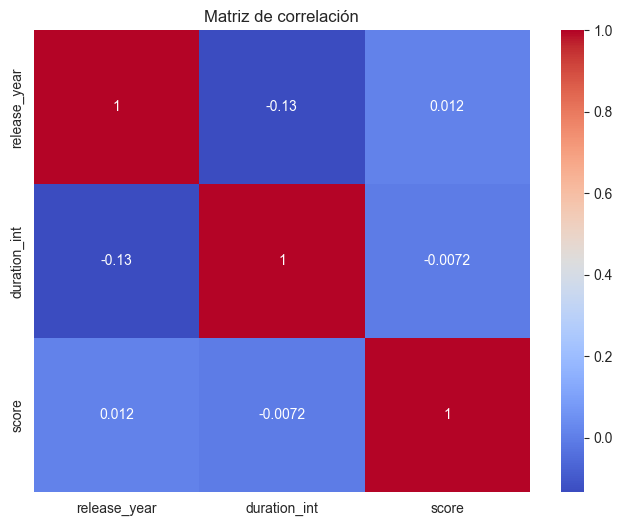

In [74]:
# Seleccionar solo las columnas numéricas
datos = datos.select_dtypes(include='number')


matriz_correlacion = datos.corr()
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Matriz de correlación')

# Mostrar el gráfico
plt.show()

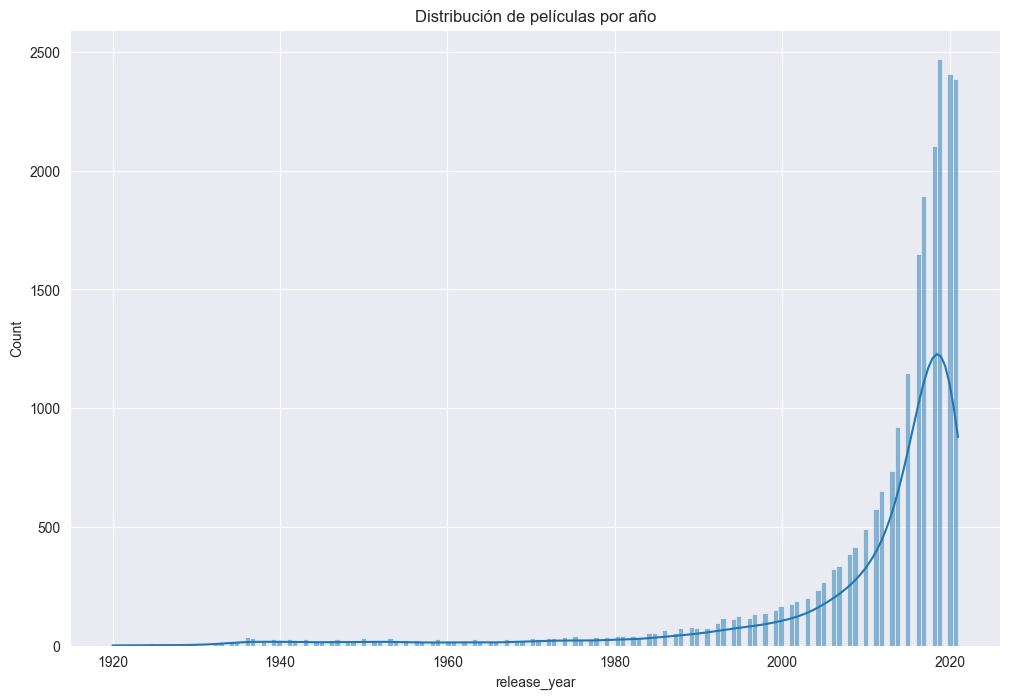

In [75]:
# histograma de año de lamzamiento y tiempo de duracion
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
sns.histplot(data=datos, x='release_year', kde=True)
plt.title('Distribución de películas por año')
plt.show()

### Busqueda de outliers

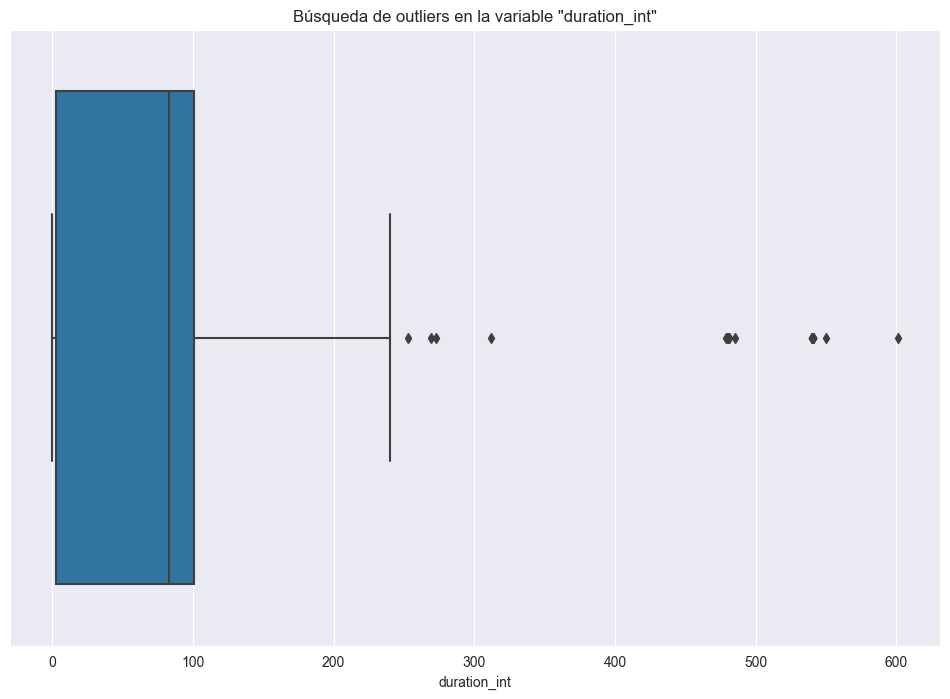

In [76]:
# buscar outliers en la variable score
variable = 'duration_int'
sns.boxplot(x=datos[variable])
plt.title('Búsqueda de outliers en la variable "{}"'.format(variable))
plt.show()


#### se observan outliers que pasan los 400 minutos de duracion, los separo en un dataframe, organizado por id de pelicula, titulo y tiempo de duracion

In [82]:
# peliculas_outliers con tiempo de duracion mayor a 400 minutos
filtro = datos['duration_int'] > 400.0
titulos = datos.loc[filtro, ['title', 'duration_int']]

titulos.head()


,title,duration_int
13477,waterfalls for sleep 8 hours,480
14263,soothing surf at del norte for sleep black screen,601
14264,soothing surf at carmel beach for sleep,480
15002,midnight waterfalls for sleep 8 hours,480
15003,midnight thunderstorm for sleep 9 hours,541


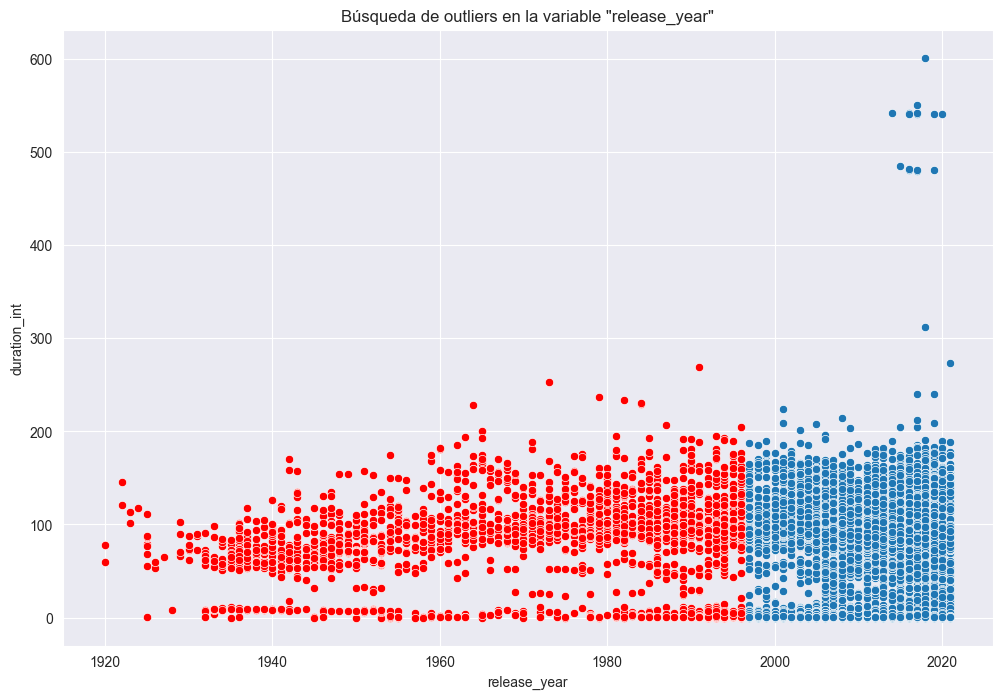

In [78]:
# Crear un subconjunto con las variables "release_year" y "duration_int"
subconjunto = datos[['release_year', 'duration_int']]

# Identificar los outliers en la variable "release_year" utilizando el método IQR
Q1 = subconjunto['release_year'].quantile(0.25)
Q3 = subconjunto['release_year'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = subconjunto[(subconjunto['release_year'] < limite_inferior) | (subconjunto['release_year'] > limite_superior)]

# Graficar los outliers utilizando una gráfica de dispersión
sns.scatterplot(data=subconjunto, x='release_year', y='duration_int')
sns.scatterplot(data=outliers, x='release_year', y='duration_int', color='red')
plt.title('Búsqueda de outliers en la variable "release_year"')
plt.show()


$$
Querys
$$

In [85]:
# Filtrar el DataFrame solo datos de Disney
df_filtrado = datos[datos['id'].str.startswith('d')]

# Mostrar el DataFrame filtrado
df_filtrado.head()

,id,type,title,director,cast,country,date_added,release_year,rating,duration_type,duration_int,score
11880,ds1,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",SinDato,2021-11-26,2016,tv-g,min,23,3.554348
11881,ds2,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",SinDato,2021-11-26,1988,pg,min,91,3.493927
11882,ds3,movie,ice age: a mammoth christmas,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,tv-g,min,23,3.559395
11883,ds4,movie,the queen family singalong,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",SinDato,2021-11-26,2021,tv-pg,min,41,3.508493
11884,ds5,tv show,the beatles: get back,SinDato,"john lennon, paul mccartney, george harrison, ...",SinDato,2021-11-25,2021,G,season,1,3.546278


ejemplo_1: Serie en Disney del año 2020 que mas temporadas tiene  

In [111]:
# Crear DataFrame de ejemplo
df_peliculas = datos

# Definir la consulta SQL con el filtrado, ordenamiento y limitación
query = """
    SELECT *
    FROM df_peliculas
    WHERE release_year = 2020
        AND id LIKE 'd%'
        AND duration_type = 'season'
    ORDER BY duration_int DESC
    LIMIT 1    
"""
# Ejecutar la consulta utilizando pandasql
df_filtrado = sqldf(query, locals())


titulo = df_filtrado["title"].values[0]

respuesta = {'title': titulo} 

print(respuesta)

{'title': 'secrets of the zoo: down under'}


In [18]:
from fastapi import HTTPException


def get_max_duration(year: int = None, platform: str = None, duration_type: str = None):
    # Cargar los datos del archivo CSV en un DataFrame de Pandas
    datos = pd.read_csv("../csvs/peliculas/peliculas_final.csv")
        
    # Crear la consulta SQL base
    query = """
        SELECT *
        FROM datos
        WHERE 1 = 1
    """    
    # Agregar condiciones opcionales según los parámetros proporcionados
    if year is not None:
        query += f" AND release_year = {year}"
    if platform is not None:
        
        query = query = f"""
                SELECT *
                FROM datos
                WHERE LOWER(SUBSTR(id, 1, 1)) = '{platform[0]}'
            """
        df_filtrado = sqldf(query, locals())            
    if duration_type is not None:
        query += f" AND duration_type = '{duration_type}'"
    
    # Agregar ordenamiento y limitación
    query += " ORDER BY duration_int DESC LIMIT 1"
    
    # Ejecutar la consulta utilizando pandasql
    df_filtrado = sqldf(query, locals())
    
    # Verificar si se encontraron resultados
    if df_filtrado.empty:
        raise HTTPException(status_code=404, detail="No se encontraron resultados.")
    
    # Obtener el título del DataFrame filtrado
    titulo = df_filtrado["title"].values[0]
    
    # Crear el diccionario de respuesta
    respuesta = {'title': titulo}
    
    # Devolver la respuesta
    return respuesta


In [20]:
print(get_max_duration(2020, 'disney','season'))

{'title': 'the simpsons'}


In [10]:
#@app.get("/verificar_conexion")
def verificar_conexion():
    try:
        # Cargar los datos del archivo CSV en un DataFrame de Pandas
        datos = pd.read_csv("../datos/csvs/peliculas/peliculas_final.csv")
        
        # Definir la consulta SQL
        query = """
            SELECT *
            FROM datos
            WHERE 1 = 1
        """
        
        # Ejecutar la consulta utilizando pandasql
        df_filtrado = sqldf(query, locals())
        
        # Verificar si se encontraron resultados
        if df_filtrado.empty:
            return {"message": "No se encontraron resultados."}
        else:
            titulo = df_filtrado["title"].values[0]
            return {"message": f"Título de la primera fila: {titulo}"}
    except FileNotFoundError:
        return {"message": "No se encontró el archivo de datos."}
    except Exception as e:
        return {"message": f"Error en la conexión a los datos: {str(e)}"}

In [11]:
print(verificar_conexion)

<function verificar_conexion at 0x000001F3C29D0360>
